In [1]:
import torch
import torchvision
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F

import time

import numpy as np
import matplotlib.pyplot as plt

from utils_cifar10 import *
from models import ResNet18

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
transform_train = transforms.Compose([
#     transforms.CenterCrop(224),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [4]:
trainset = datasets.CIFAR10(root='./data', train=True,download=True, transform=transform_train)
testset = datasets.CIFAR10(root='./data',train=False,download=True,transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## ResNet18 lr 1e-2

In [6]:
batch_size = 256

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False)

In [8]:
epoch = 50

In [9]:
net = ResNet18().to(device)
if device == 'cuda':
    net = nn.DataParallel(net)
    torch.backends.cudnn.benchmark = True

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-2, weight_decay=5e-4)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=3, min_lr=1e-5)

In [11]:
Acc, Loss, Lr = train(net, trainloader, testloader, epoch, optimizer, criterion)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [  1/ 50] | Train Loss:1.913802 | Train Acc:30.81% | Test Loss:1.799724 | Test Acc:32.05% | Learning Rate:0.010000 | Time: 00:35
Epoch [  2/ 50] | Train Loss:1.487230 | Train Acc:45.26% | Test Loss:1.582793 | Test Acc:43.10% | Learning Rate:0.010000 | Time: 00:32
Epoch [  3/ 50] | Train Loss:1.242548 | Train Acc:54.70% | Test Loss:2.533326 | Test Acc:38.01% | Learning Rate:0.010000 | Time: 00:33
Epoch [  4/ 50] | Train Loss:1.107341 | Train Acc:60.29% | Test Loss:1.958791 | Test Acc:43.93% | Learning Rate:0.010000 | Time: 00:33
Epoch [  5/ 50] | Train Loss:1.026744 | Train Acc:63.20% | Test Loss:1.071733 | Test Acc:60.93% | Learning Rate:0.010000 | Time: 00:33
Epoch [  6/ 50] | Train Loss:0.974407 | Train Acc:65.28% | Test Loss:1.354338 | Test Acc:58.33% | Learning Rate:0.010000 | Time: 00:34
Epoch [  7/ 50] | Train Loss:0.914716 | Train Acc:67.68% | Test Loss:1.062415 | Test Acc:63.23% | Learning Rate:0.010000 | Time: 00:33
Epoch [  8/ 50] | Train Loss:0.873456 | Train Acc:69.31

In [12]:
def plot_history(epoches, Acc, Loss, lr=None):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'

    epoch_list = range(1,epoches + 1)
    plt.plot(epoch_list, Loss['train_loss'])
    plt.plot(epoch_list, Loss['test_loss'])
    plt.xlabel('epoch')
    plt.ylabel('Loss Value')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(epoch_list, Acc['train_acc'])
    plt.plot(epoch_list, Acc['test_acc'])
    plt.xlabel('epoch')
    plt.ylabel('Acc Value')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # plt.plot(epoch_list, lr)
    # plt.xlabel('epoch')
    # plt.ylabel('Train LR')
    # plt.show()

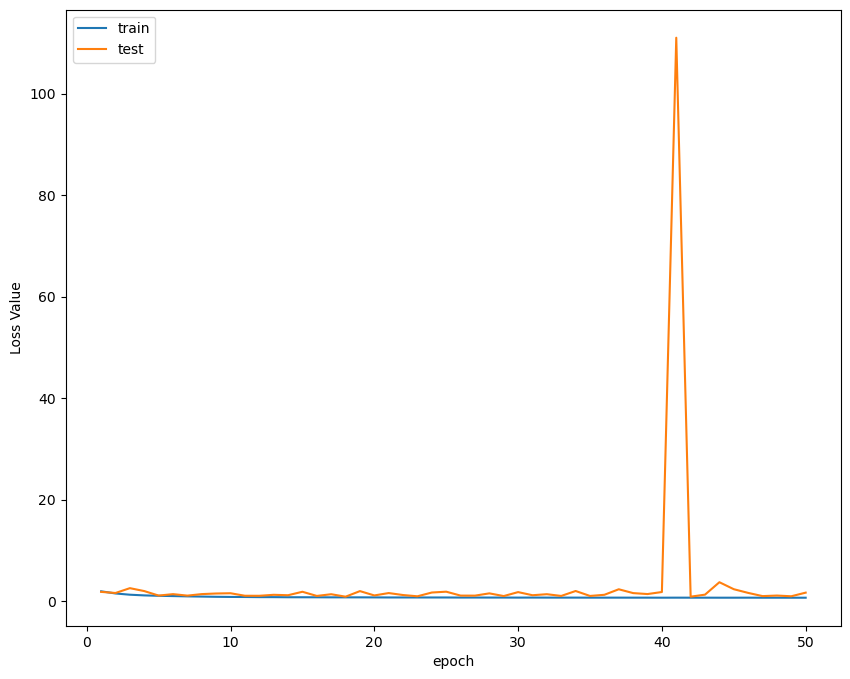

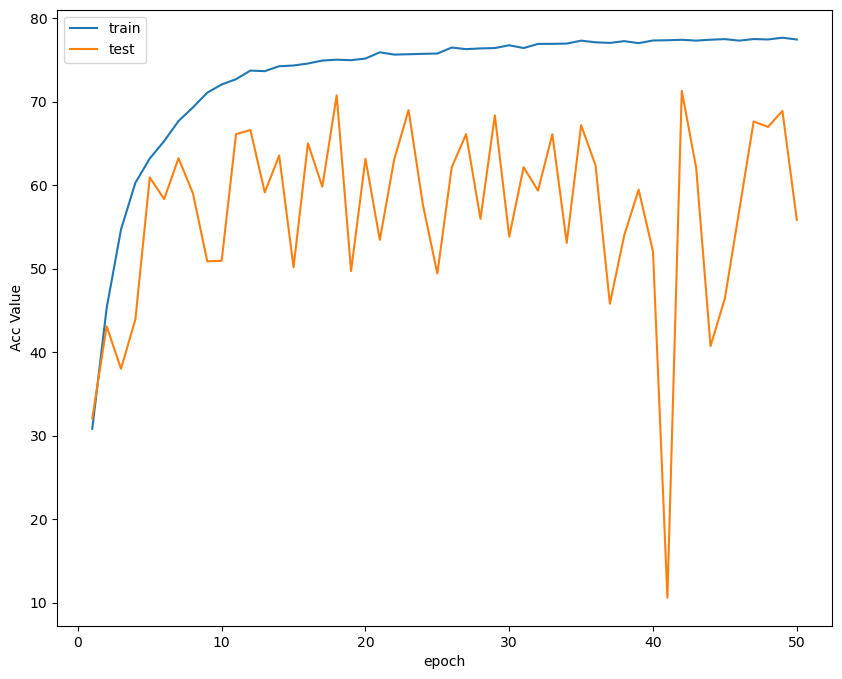

In [13]:
plot_history(epoch, Acc, Loss, Lr)

## ResNet18 lr 1e-3

In [14]:
net = ResNet18().to(device)
if device == 'cuda':
    net = nn.DataParallel(net)
    torch.backends.cudnn.benchmark = True

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3, weight_decay=5e-4)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=3, min_lr=1e-5)

In [16]:
Acc, Loss, Lr = train(net, trainloader, testloader, epoch, optimizer, criterion)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [  1/ 50] | Train Loss:1.504694 | Train Acc:44.53% | Test Loss:1.446256 | Test Acc:48.04% | Learning Rate:0.001000 | Time: 00:40
Epoch [  2/ 50] | Train Loss:1.030850 | Train Acc:63.17% | Test Loss:1.066485 | Test Acc:62.78% | Learning Rate:0.001000 | Time: 00:35
Epoch [  3/ 50] | Train Loss:0.828767 | Train Acc:71.08% | Test Loss:1.030256 | Test Acc:65.97% | Learning Rate:0.001000 | Time: 00:34
Epoch [  4/ 50] | Train Loss:0.693133 | Train Acc:75.86% | Test Loss:0.830838 | Test Acc:72.73% | Learning Rate:0.001000 | Time: 00:35
Epoch [  5/ 50] | Train Loss:0.616318 | Train Acc:78.70% | Test Loss:0.677889 | Test Acc:77.09% | Learning Rate:0.001000 | Time: 00:35
Epoch [  6/ 50] | Train Loss:0.551564 | Train Acc:81.00% | Test Loss:0.589825 | Test Acc:80.23% | Learning Rate:0.001000 | Time: 00:36
Epoch [  7/ 50] | Train Loss:0.513971 | Train Acc:82.47% | Test Loss:0.755286 | Test Acc:75.78% | Learning Rate:0.001000 | Time: 00:35
Epoch [  8/ 50] | Train Loss:0.481381 | Train Acc:83.58

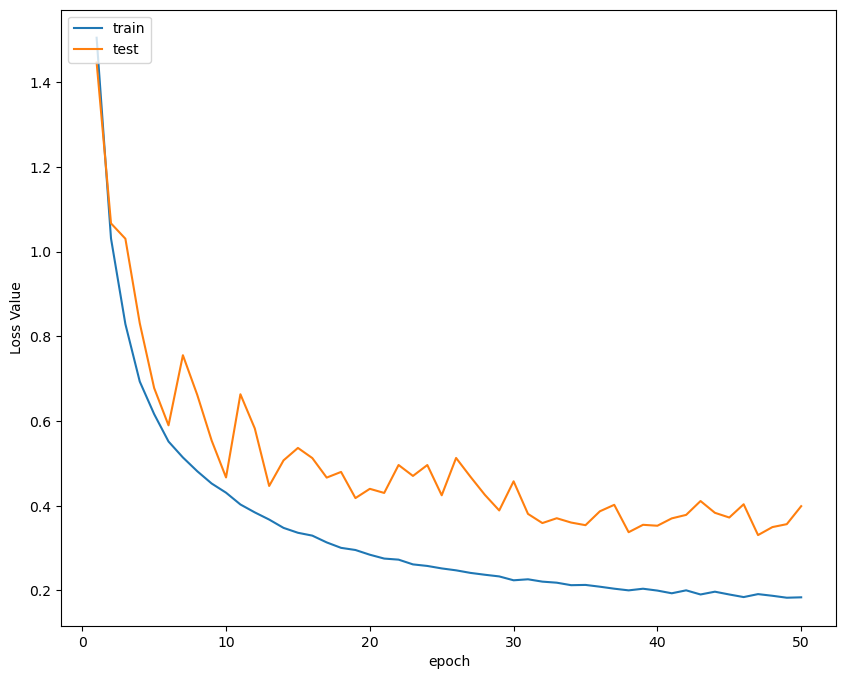

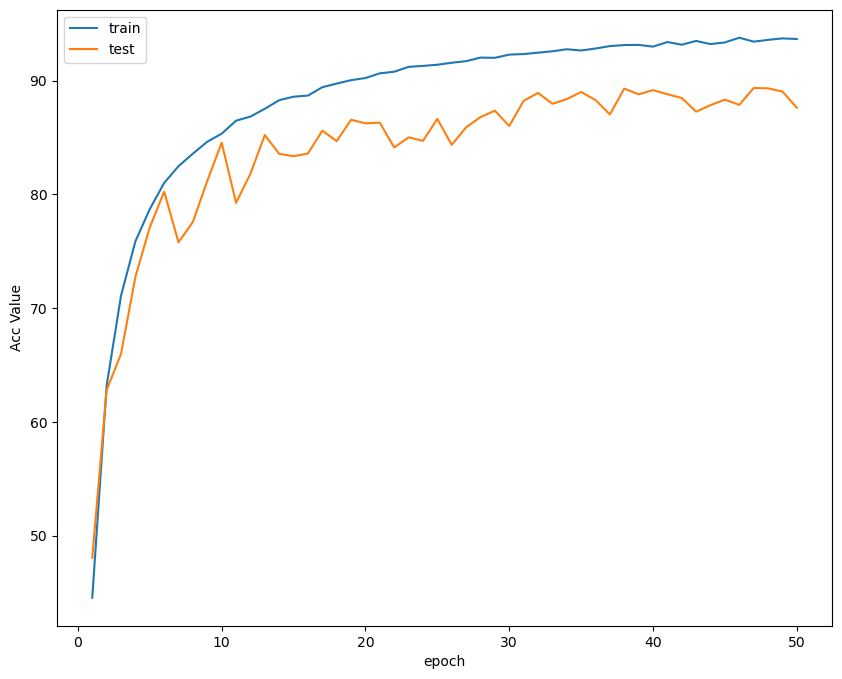

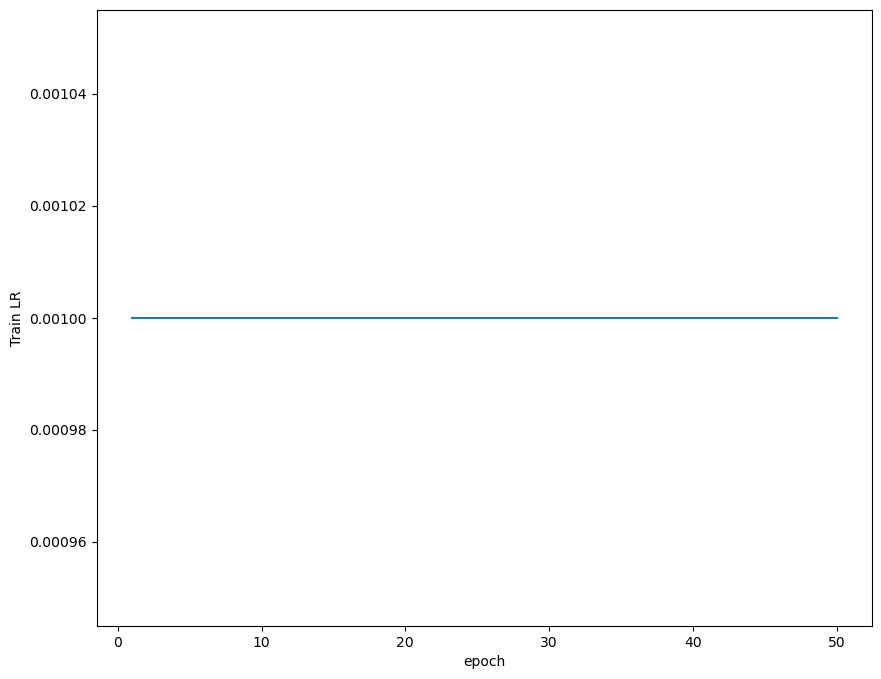

In [17]:
plot_history(epoch ,Acc, Loss, Lr)

## ResNet18 lr 1e-4

In [18]:
net = ResNet18().to(device)
if device == 'cuda':
    net = nn.DataParallel(net)
    torch.backends.cudnn.benchmark = True

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4, weight_decay=5e-4)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=3, min_lr=1e-5)

In [20]:
Acc, Loss, Lr = train(net, trainloader, testloader, epoch, optimizer, criterion)

Epoch [  1/ 50] | Train Loss:1.455491 | Train Acc:46.71% | Test Loss:1.363095 | Test Acc:52.93% | Learning Rate:0.000100 | Time: 00:34
Epoch [  2/ 50] | Train Loss:1.033485 | Train Acc:63.00% | Test Loss:1.115404 | Test Acc:62.96% | Learning Rate:0.000100 | Time: 00:35
Epoch [  3/ 50] | Train Loss:0.831444 | Train Acc:70.73% | Test Loss:0.779083 | Test Acc:72.65% | Learning Rate:0.000100 | Time: 00:34
Epoch [  4/ 50] | Train Loss:0.700478 | Train Acc:75.48% | Test Loss:0.703844 | Test Acc:76.00% | Learning Rate:0.000100 | Time: 00:35
Epoch [  5/ 50] | Train Loss:0.617925 | Train Acc:78.41% | Test Loss:0.610323 | Test Acc:78.87% | Learning Rate:0.000100 | Time: 00:35
Epoch [  6/ 50] | Train Loss:0.561984 | Train Acc:80.51% | Test Loss:0.648957 | Test Acc:78.04% | Learning Rate:0.000100 | Time: 00:35
Epoch [  7/ 50] | Train Loss:0.506748 | Train Acc:82.43% | Test Loss:0.604682 | Test Acc:79.31% | Learning Rate:0.000100 | Time: 00:35
Epoch [  8/ 50] | Train Loss:0.470358 | Train Acc:83.64

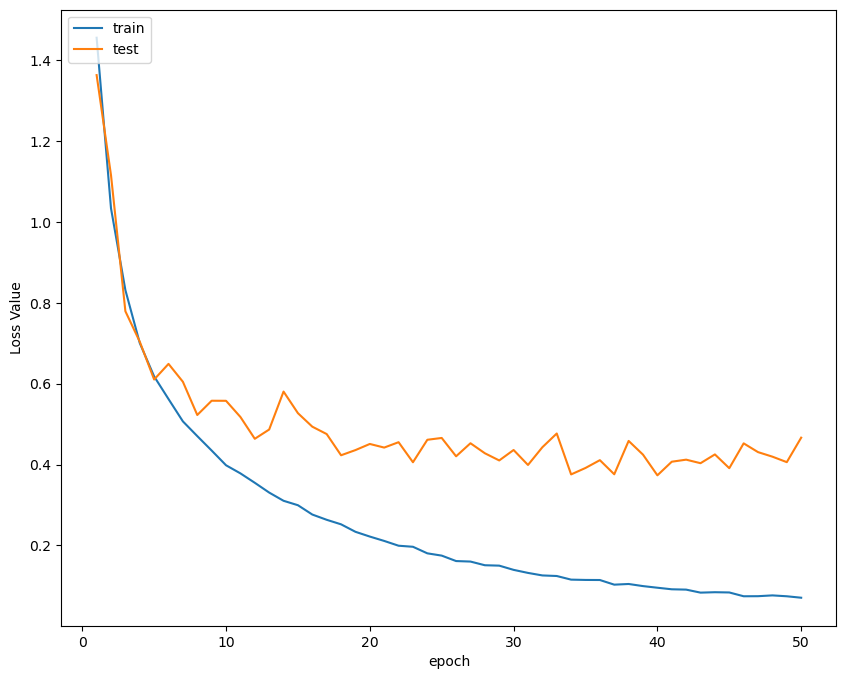

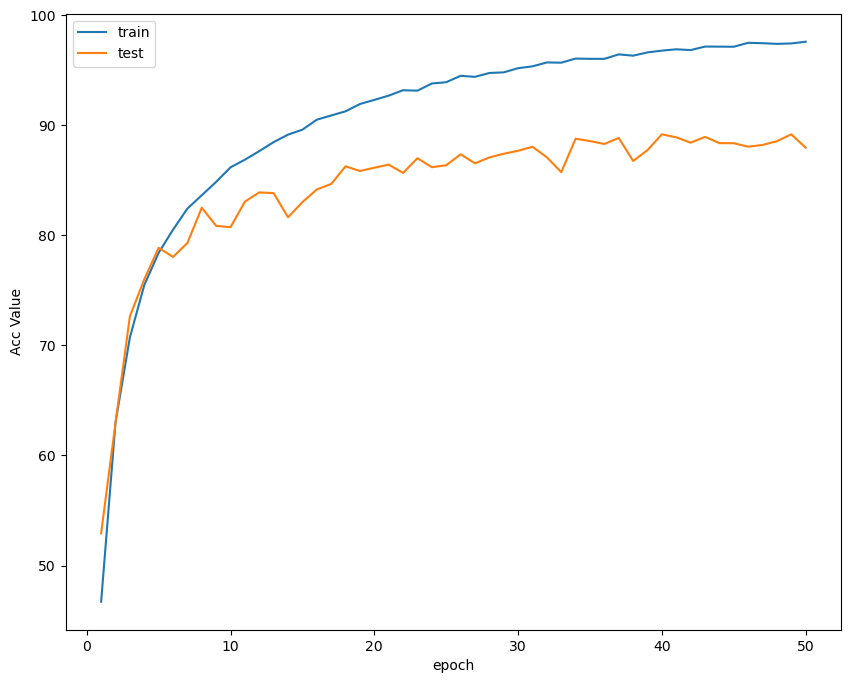

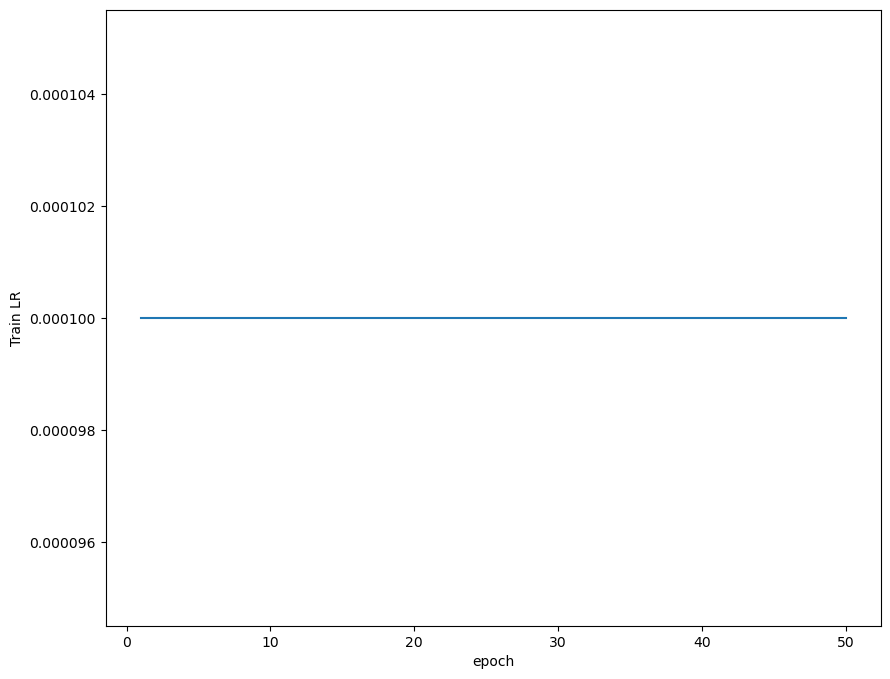

In [21]:
plot_history(epoch ,Acc, Loss, Lr)

## ResNet18 lr 1e-5

In [22]:
net = ResNet18().to(device)
if device == 'cuda':
    net = nn.DataParallel(net)
    torch.backends.cudnn.benchmark = True

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-5, weight_decay=5e-4)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1, patience=3, min_lr=1e-5)

In [24]:
Acc, Loss, Lr = train(net, trainloader, testloader, epoch, optimizer, criterion)

Epoch [  1/ 50] | Train Loss:1.857725 | Train Acc:31.54% | Test Loss:1.565939 | Test Acc:42.30% | Learning Rate:0.000010 | Time: 00:36
Epoch [  2/ 50] | Train Loss:1.501118 | Train Acc:44.76% | Test Loss:1.385163 | Test Acc:48.86% | Learning Rate:0.000010 | Time: 00:36
Epoch [  3/ 50] | Train Loss:1.362013 | Train Acc:50.55% | Test Loss:1.284679 | Test Acc:53.11% | Learning Rate:0.000010 | Time: 00:36
Epoch [  4/ 50] | Train Loss:1.265073 | Train Acc:54.17% | Test Loss:1.209283 | Test Acc:56.71% | Learning Rate:0.000010 | Time: 00:36
Epoch [  5/ 50] | Train Loss:1.189070 | Train Acc:57.23% | Test Loss:1.154092 | Test Acc:58.30% | Learning Rate:0.000010 | Time: 00:36
Epoch [  6/ 50] | Train Loss:1.126913 | Train Acc:59.80% | Test Loss:1.096469 | Test Acc:60.67% | Learning Rate:0.000010 | Time: 00:37
Epoch [  7/ 50] | Train Loss:1.074194 | Train Acc:61.57% | Test Loss:1.069479 | Test Acc:61.70% | Learning Rate:0.000010 | Time: 00:36
Epoch [  8/ 50] | Train Loss:1.034926 | Train Acc:63.18

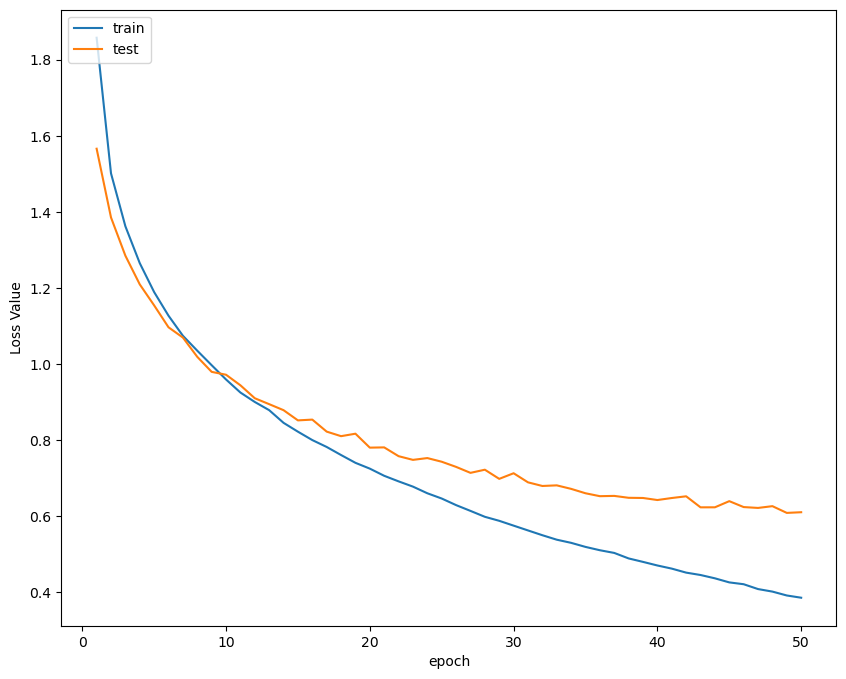

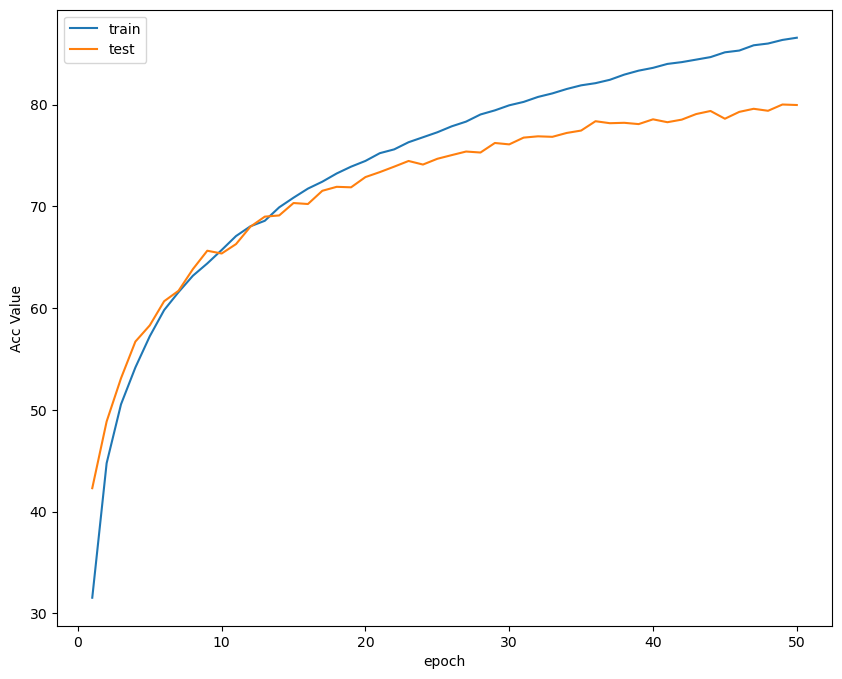

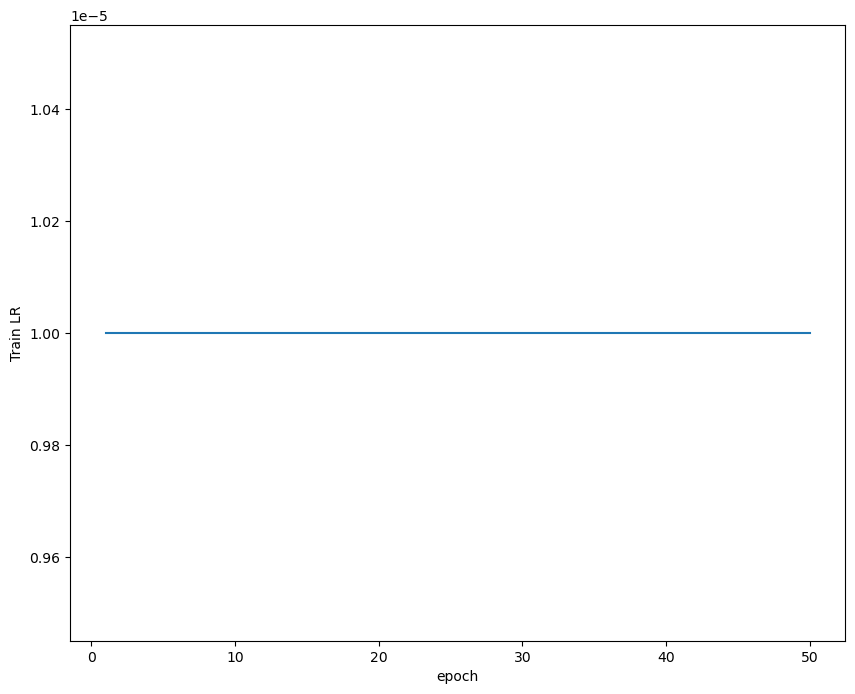

In [25]:
plot_history(epoch, Acc, Loss, Lr)